In [1]:
import h5py
import numpy as np
import math
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline as spline
from scipy.fftpack import fft, fftshift ,ifft,rfft,fftfreq,rfftfreq
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c
Frequency=1/Time

In [2]:
BAM=['002','003','004','009','010','022','035','036','046','048','053','057','058','059','061','065','070','080','089','090','091','092','093','098','107','121','122','123','124','126','128']

Define functions to calculate different expected frequencies

For $q=1$

In [3]:
def f20(M,R6):
    return 8.943+4.059*M-1.332*R6-.358*(M**2)-.182*R6*M+.048*(R6**2)

In [4]:
def fspir(M,R8):
    return 6.264+1.929*M-.645*R8+.881*(M**2)-.311*R8*M+.03*(R8**2)

In [5]:
def fpeak(M,R6):
    return 13.822-0.576*M-1.375*R6+.479*(M**2)-.073*R6*M+.044*(R6**2)

For all cases

In [6]:
def f20_a(M,R6):
    return 9.586+4.09*M-1.427*R6+.048*(M**2)-.261*R6*M+.055*(R6**2)

In [7]:
def fspir_a(M,R8):
    return 5.846+1.75*M-.555*R8+1.002*(M**2)-.316*R8*M+.026*(R8**2)

In [8]:
def fpeak_a(M,R8):
    return 10.942-.369*M-.987*R8+1.095*(M**2)-.201*R8*M+.036*(R8**2)

Define functions to do the fft for our data  

In [9]:
def fre_do(x,y,mass):
    fd=fft(y)
    N=len(y)
    if (N % 2) == 1:
        N=N+1
    T=x[1]-x[0]
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))/mass
    fq=fftfreq(len(y))
    mask=fq>=0
    fd=2.0*(fd/N)
    fd=fd[mask]
    fd=abs(fd)
    return xf,fd
    

In [10]:
def analyze(rh,mass):
    
    
    
    rhM=rh[:,1]
    time=rh[:,0]
    
    peaks,prop=scipy.signal.find_peaks(abs(rhM))
    ampls=rhM[peaks]
    merg=np.amax(abs(ampls))
    merg=np.where(abs(ampls)==merg)
    merg=int(merg[0])
    t0=peaks[merg]
    
    ampl=rhM[t0:]
    tim=time[t0:]
    
    #ampl=rhM
    #tim=time
    
    tuk=signal.tukey(len(ampl))
    dat=ampl*tuk
    
    fq,fd=fre_do(tim,dat,mass)
    
    mx=np.where(fd==np.amax(fd))[0][0]
    freq=fq[mx]
    amp=fd[mx]
    fig=plt.figure()
    plt.plot((fq*Frequency),fd)
    plt.xlim(0,5500)
    return freq,amp,fig
    

Read metadata 

In [11]:

SLy=1
H4=2
MS1=3
MPA1=4
ALF2=5
MS1b=6
ms1b=6
ENG=7


In [12]:
q2 = np.zeros(31)
mas2=np.zeros(31)
eos=np.zeros(31)


i=0
for m in range(0,2):
    for k in range(0,10):
        for j in range(0,10):
            name = 'metadata/BAM:0%s%s%s.txt' %(m,k,j)
            try:
                f=open(name)
                lines=f.readlines() 
                exec(lines[10])
                q2[i] = id_mass_ratio
                exec(lines[8])
                mas2[i]=id_mass
                if i==0:
                    eos[i]=8 #by hand because 2H can not be given a value
                if i>0:
                    exec(lines[15])
                    eos[i]=id_eos
                
                i=i+1
            except OSError:
                pass



Isolate $q=1$ cases

In [13]:
index=[]
j=0
for i in range(len(q2)):
    if q2[i]==1:
        index.insert(j,i)
        j=j+1



Calculate chirp mass using the formula: $$ \left[\frac{q}{(1+q)^2}\right]^{3/5}M_{total} $$

In [14]:
Mc=pow(q2/pow(1+q2,2),3/5)*mas2

Find the radius for solar masses 1.6 and 1.8 for different EOS

In [15]:
m_r1=np.load('tid_def/SLy.npy')
m_r2=np.load('tid_def/H4.npy')
m_r3=np.load('tid_def/MS1.npy')
m_r4=np.load('tid_def/MPA1.npy')
m_r5=np.load('tid_def/ALF2.npy')
m_r6=np.load('tid_def/MS1b.npy')
m_r7=np.load('tid_def/ENG.npy')
m_r8=np.load('tid_def/2H.npy')


#k_l1=np.load('tid_def/k_l_SLy.npy')
#k_l2=np.load('tid_def/k_l_H4.npy')
#k_l3=np.load('tid_def/k_l_MS1.npy')
#k_l4=np.load('tid_def/k_l_MPA1.npy')
#k_l5=np.load('tid_def/k_l_ALF2.npy')
#k_l6=np.load('tid_def/k_l_MS1b.npy')
#k_l7=np.load('tid_def/k_l_ENG.npy')
#k_l8=np.load('tid_def/k_l_2H.npy')

Find the $R_{1.6}$ , $R_{1.8}$ for every binary 

In [16]:
mx=np.amax(m_r1[0])
idx=np.where(m_r1[0]==mx)
idx=idx[0][0]
#cs1=spline(m_r1[0][1:idx],k_l1[0][1:idx])
cs11=spline(m_r1[0][1:idx],m_r1[1][1:idx])

mx=np.amax(m_r2[0])
idx=np.where(m_r2[0]==mx)
idx=idx[0][0]
#cs2=spline(m_r2[0][1:idx],k_l2[0][1:idx])
cs21=spline(m_r2[0][1:idx],m_r2[1][1:idx])

mx=np.amax(m_r3[0])
idx=np.where(m_r3[0]==mx)
idx=idx[0][0]
#cs3=spline(m_r3[0][1:idx],k_l3[0][1:idx])
cs31=spline(m_r3[0][1:idx],m_r3[1][1:idx])

mx=np.amax(m_r4[0])
idx=np.where(m_r4[0]==mx)
idx=idx[0][0]
#cs4=spline(m_r4[0][1:idx],k_l4[0][1:idx])
cs41=spline(m_r4[0][1:idx],m_r4[1][1:idx])

mx=np.amax(m_r5[0])
idx=np.where(m_r5[0]==mx)
idx=idx[0][0]
#cs5=spline(m_r5[0][1:idx],k_l5[0][1:idx])
cs51=spline(m_r5[0][1:idx],m_r5[1][1:idx])

mx=np.amax(m_r6[0])
idx=np.where(m_r6[0]==mx)
idx=idx[0][0]
#cs6=spline(m_r6[0][1:idx],k_l6[0][1:idx])
cs61=spline(m_r6[0][1:idx],m_r6[1][1:idx])

mx=np.amax(m_r7[0])
idx=np.where(m_r7[0]==mx)
idx=idx[0][0]
#cs7=spline(m_r7[0][1:idx],k_l7[0][1:idx])
cs71=spline(m_r7[0][1:idx],m_r7[1][1:idx])

mx=np.amax(m_r8[0])
idx=np.where(m_r8[0]==mx)
idx=idx[0][0]
#cs8=spline(m_r8[0][1:idx],k_l8[0][1:idx])
cs81=spline(m_r8[0][1:idx],m_r8[1][1:idx])

In [17]:
r68=np.zeros((len(BAM),2))

for i in range(len(BAM)):
    if eos[i]==1:
        r68[i,0]=cs11(1.6)*Length/1.0e5
        r68[i,1]=cs11(1.8)*Length/1.0e5
        
    elif eos[i]==2:
        r68[i,0]=cs21(1.6)*Length/1.0e5
        r68[i,1]=cs21(1.8)*Length/1.0e5
    elif eos[i]==3:
        r68[i,0]=cs31(1.6)*Length/1.0e5
        r68[i,1]=cs31(1.8)*Length/1.0e5
        
    elif eos[i]==4:
        r68[i,0]=cs41(1.6)*Length/1.0e5
        r68[i,1]=cs41(1.8)*Length/1.0e5
        
    elif eos[i]==5:
        r68[i,0]=cs51(1.6)*Length/1.0e5
        r68[i,1]=cs51(1.8)*Length/1.0e5
        
    elif eos[i]==6:
        r68[i,0]=cs61(1.6)*Length/1.0e5
        r68[i,1]=cs61(1.8)*Length/1.0e5
        
    elif eos[i]==7:
        r68[i,0]=cs71(1.6)*Length/1.0e5
        r68[i,1]=cs71(1.8)*Length/1.0e5
        
    elif eos[i]==8:
        r68[i,0]=cs81(1.6)*Length/1.0e5
        r68[i,1]=cs81(1.8)*Length/1.0e5
        
    

Calculate the different frequencies for $q=1$

In [18]:
f_2=np.zeros(len(BAM))
f_s=np.zeros(len(BAM))
f_p=np.zeros(len(BAM))
for i in index:
    f_2[i]=f20(Mc[i],r68[i,0])
    f_p[i]=fpeak(Mc[i],r68[i,0])
    f_s[i]=fspir(Mc[i],r68[i,1])

Do the analysis and produce the plots for $q=1$

data/BAM:0002.h5


/home/jannis/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


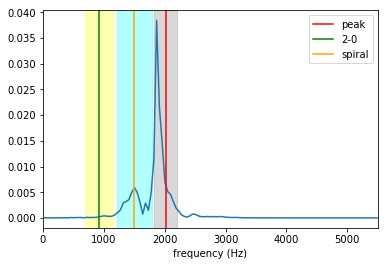

_____________________________________________________
data/BAM:0003.h5


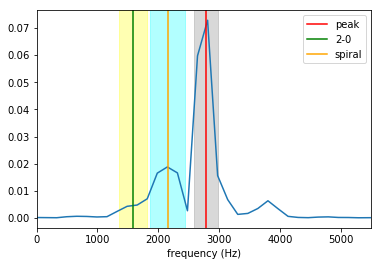

_____________________________________________________
data/BAM:0004.h5


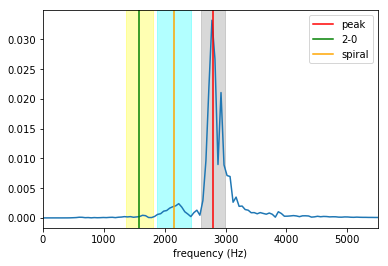

_____________________________________________________
data/BAM:0022.h5


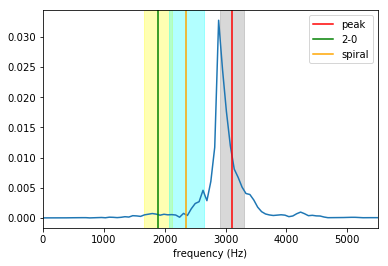

_____________________________________________________
data/BAM:0035.h5


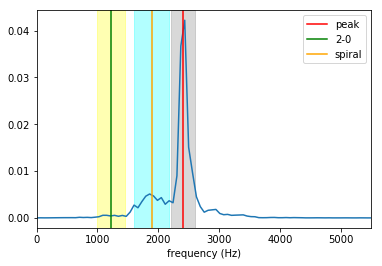

_____________________________________________________
data/BAM:0036.h5


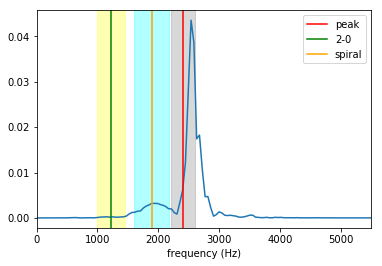

_____________________________________________________
data/BAM:0058.h5


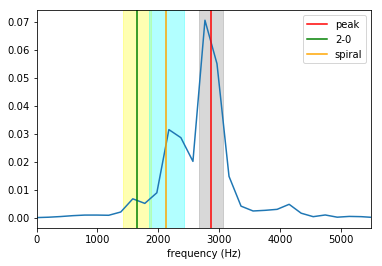

_____________________________________________________
data/BAM:0061.h5


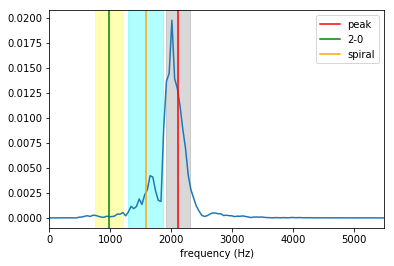

_____________________________________________________
data/BAM:0065.h5


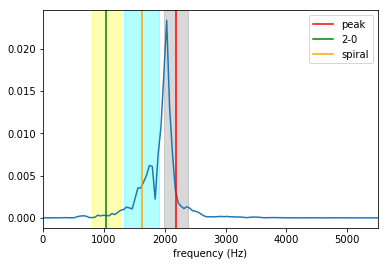

_____________________________________________________
data/BAM:0070.h5


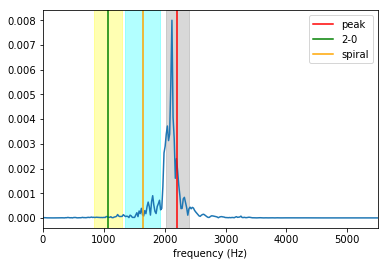

_____________________________________________________
data/BAM:0090.h5


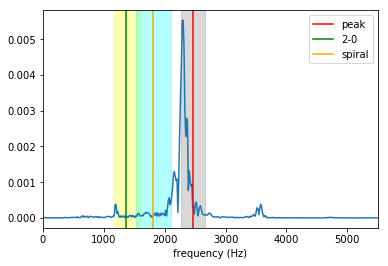

_____________________________________________________
data/BAM:0092.h5


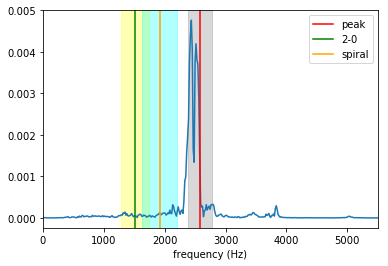

_____________________________________________________
data/BAM:0098.h5


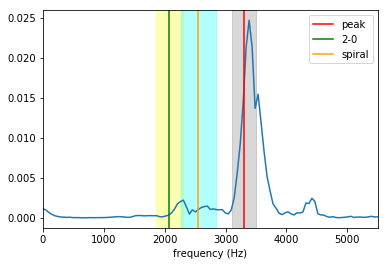

_____________________________________________________


In [19]:

for i in index:
    name = 'data/BAM:0'+BAM[i]+'.h5' 
    print(name)
    file=h5py.File(name,'r')
    dat = list(file["/rh_22"])
    rh = np.array(file["/rh_22/%s" %dat[-1]])
    freq2,amp2,fig1=analyze(rh,mas2[i])
    ax=plt.subplot()
    ax.axvline(x=(f_p[i]*Mc[i])*1000,color='r',label='peak')
    ax.axvspan((f_p[i]*Mc[i])*1000-196, (f_p[i]*Mc[i])*1000+196, alpha=0.3, color='grey')
    ax.axvline(x=(f_2[i]*Mc[i])*1000,color='g',label='2-0')
    ax.axvspan((f_2[i]*Mc[i])*1000-229, (f_2[i]*Mc[i])*1000+229, alpha=0.3, color='yellow')
    ax.axvline((f_s[i]*Mc[i])*1000,color='orange',label='spiral') 
    ax.axvspan((f_s[i]*Mc[i])*1000-286, (f_s[i]*Mc[i])*1000+286, alpha=0.3, color='cyan')
    plt.xlabel('frequency (Hz)')
    plt.legend()
    plt.show()
    print('_____________________________________________________')
    

data/BAM:0002.h5


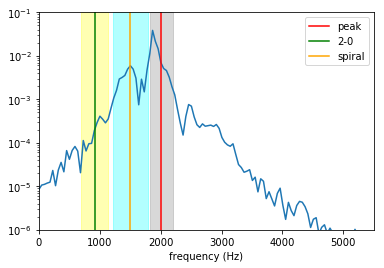

_____________________________________________________
data/BAM:0003.h5


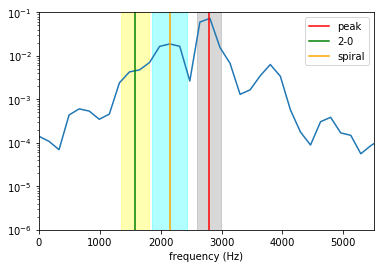

_____________________________________________________
data/BAM:0004.h5


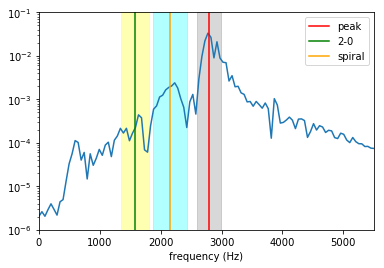

_____________________________________________________
data/BAM:0022.h5


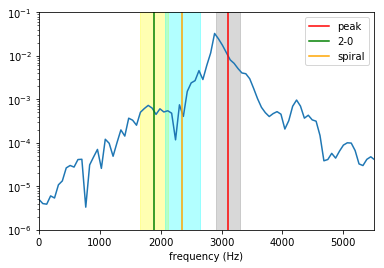

_____________________________________________________
data/BAM:0035.h5


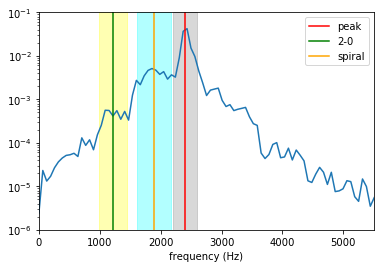

_____________________________________________________
data/BAM:0036.h5


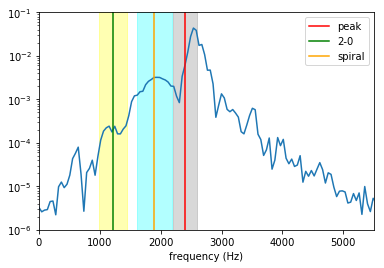

_____________________________________________________
data/BAM:0058.h5


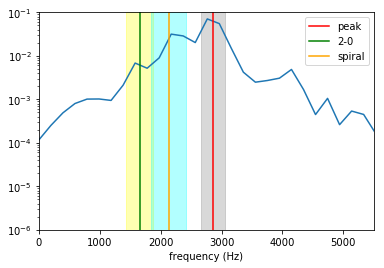

_____________________________________________________
data/BAM:0061.h5


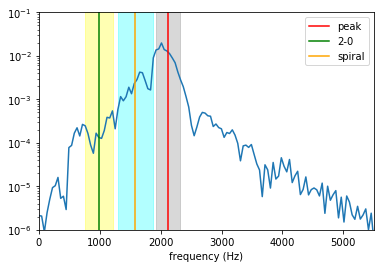

_____________________________________________________
data/BAM:0065.h5


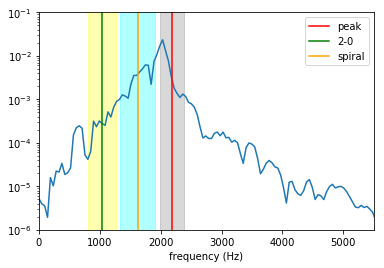

_____________________________________________________
data/BAM:0070.h5


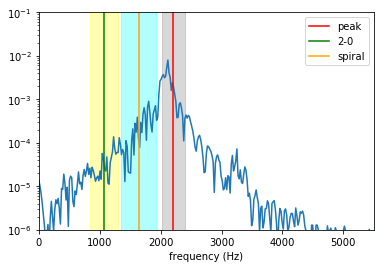

_____________________________________________________
data/BAM:0090.h5


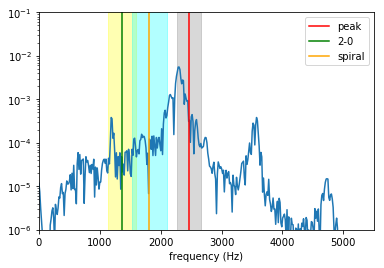

_____________________________________________________
data/BAM:0092.h5


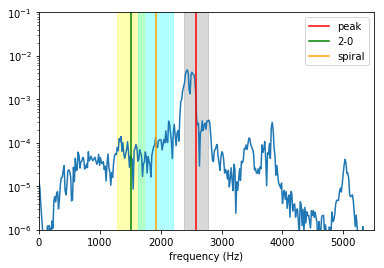

_____________________________________________________
data/BAM:0098.h5


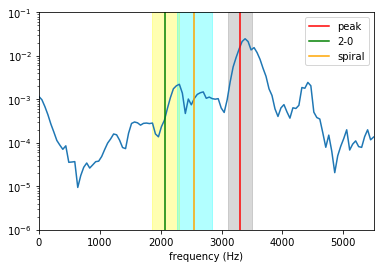

_____________________________________________________


In [20]:

for i in index:
    name = 'data/BAM:0'+BAM[i]+'.h5' 
    print(name)
    file=h5py.File(name,'r')
    dat = list(file["/rh_22"])
    rh = np.array(file["/rh_22/%s" %dat[-1]])
    freq2,amp2,fig1=analyze(rh,mas2[i])
    ax=plt.subplot()
    ax.axvline(x=(f_p[i]*Mc[i])*1000,color='r',label='peak')
    ax.axvspan((f_p[i]*Mc[i])*1000-196, (f_p[i]*Mc[i])*1000+196, alpha=0.3, color='grey')
    ax.axvline(x=(f_2[i]*Mc[i])*1000,color='g',label='2-0')
    ax.axvspan((f_2[i]*Mc[i])*1000-229, (f_2[i]*Mc[i])*1000+229, alpha=0.3, color='yellow')
    ax.axvline((f_s[i]*Mc[i])*1000,color='orange',label='spiral') 
    ax.axvspan((f_s[i]*Mc[i])*1000-286, (f_s[i]*Mc[i])*1000+286, alpha=0.3, color='cyan')
    plt.xlabel('frequency (Hz)')
    plt.legend()
    plt.yscale('log')
    plt.ylim(10**(-6),10**(-1))
    plt.show()
    print('_____________________________________________________')
    

Calculate the different frequencies for all cases

In [21]:
f_2_a=np.zeros(len(BAM))
f_s_a=np.zeros(len(BAM))
f_p_a=np.zeros(len(BAM))
for i in range(len(BAM)):
    f_2_a[i]=f20_a(Mc[i],r68[i,0])
    f_p_a[i]=fpeak_a(Mc[i],r68[i,0])
    f_s_a[i]=fspir_a(Mc[i],r68[i,1])

Do the analysis and produce the plots for all cases

data/BAM:0002.h5


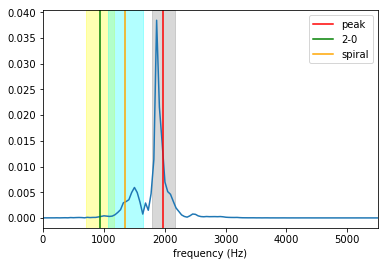

_____________________________________________________
data/BAM:0003.h5


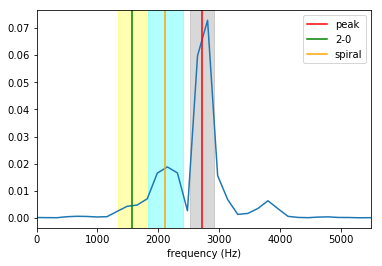

_____________________________________________________
data/BAM:0004.h5


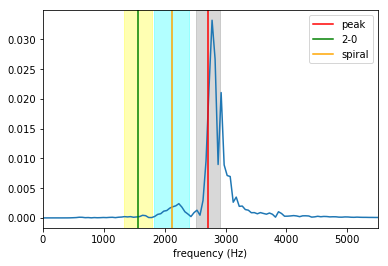

_____________________________________________________
data/BAM:0009.h5


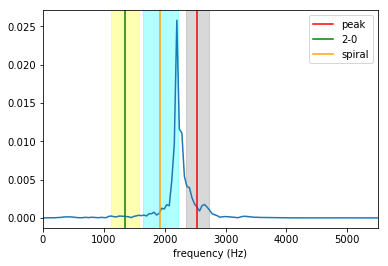

_____________________________________________________
data/BAM:0010.h5


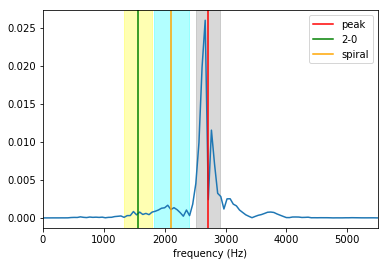

_____________________________________________________
data/BAM:0022.h5


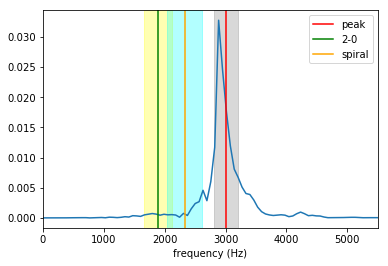

_____________________________________________________
data/BAM:0035.h5


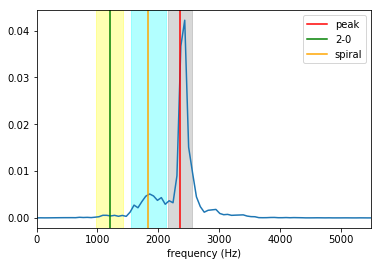

_____________________________________________________
data/BAM:0036.h5


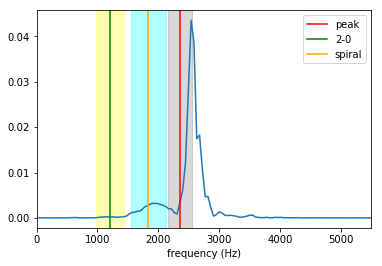

_____________________________________________________
data/BAM:0046.h5


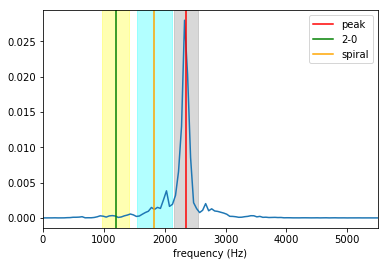

_____________________________________________________
data/BAM:0048.h5


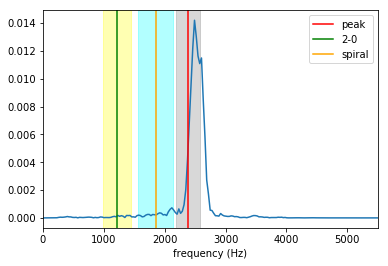

_____________________________________________________
data/BAM:0053.h5


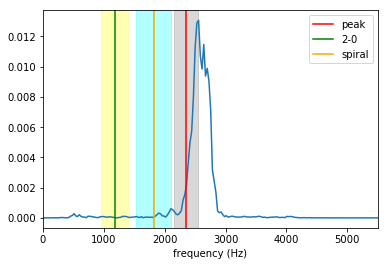

_____________________________________________________
data/BAM:0057.h5


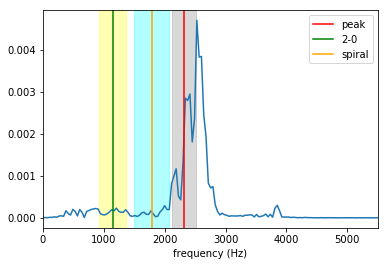

_____________________________________________________
data/BAM:0058.h5


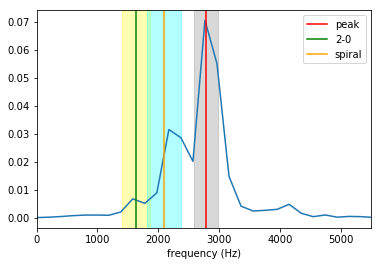

_____________________________________________________
data/BAM:0059.h5


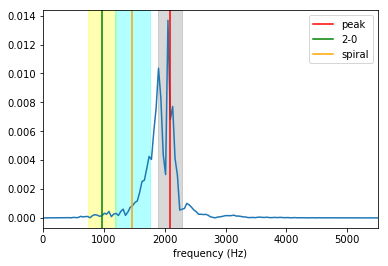

_____________________________________________________
data/BAM:0061.h5


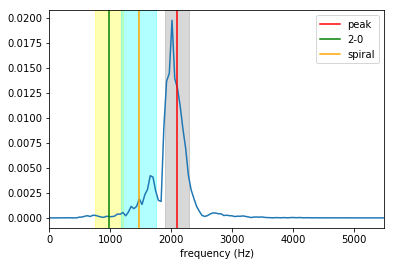

_____________________________________________________
data/BAM:0065.h5


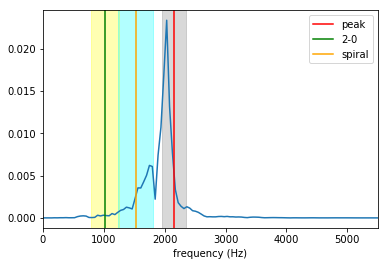

_____________________________________________________
data/BAM:0070.h5


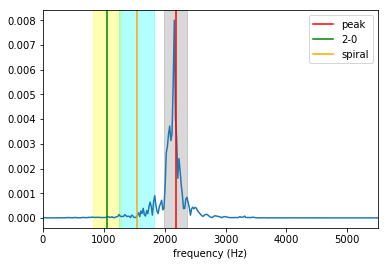

_____________________________________________________
data/BAM:0080.h5


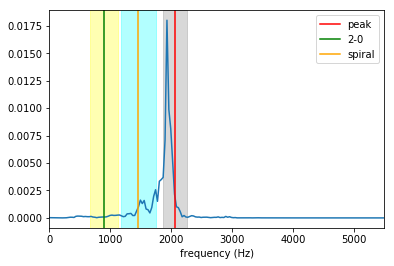

_____________________________________________________
data/BAM:0089.h5


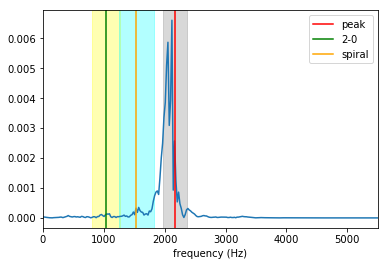

_____________________________________________________
data/BAM:0090.h5


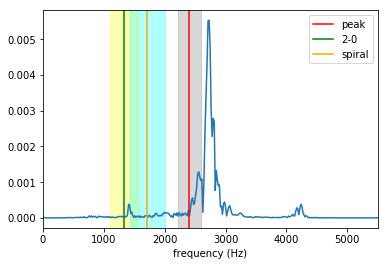

_____________________________________________________
data/BAM:0091.h5


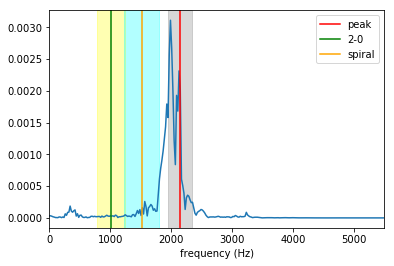

_____________________________________________________
data/BAM:0092.h5


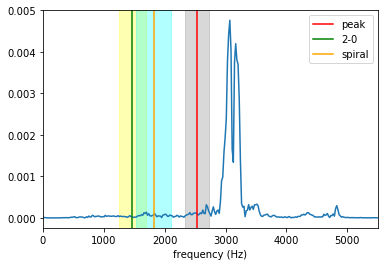

_____________________________________________________
data/BAM:0093.h5


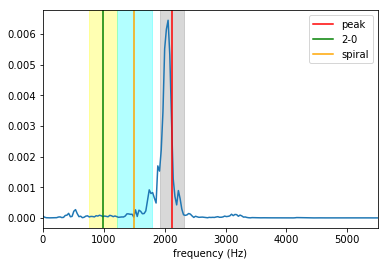

_____________________________________________________
data/BAM:0098.h5


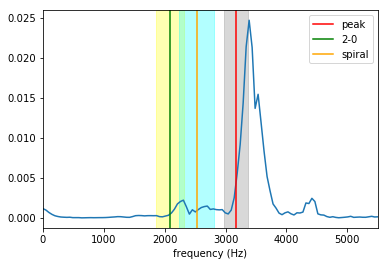

_____________________________________________________
data/BAM:0107.h5


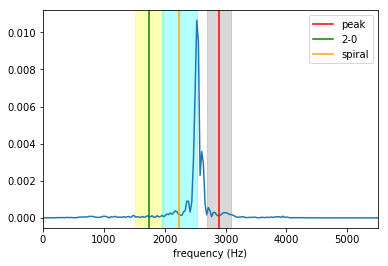

_____________________________________________________
data/BAM:0121.h5


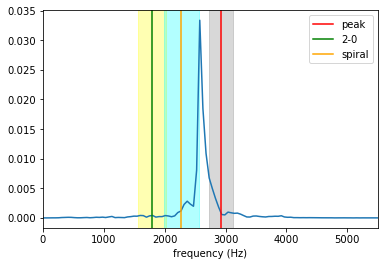

_____________________________________________________
data/BAM:0122.h5


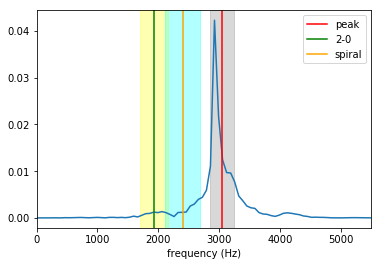

_____________________________________________________
data/BAM:0123.h5


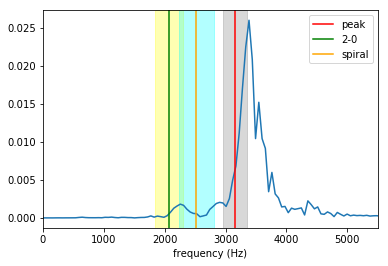

_____________________________________________________
data/BAM:0124.h5


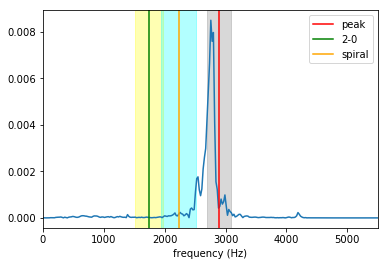

_____________________________________________________
data/BAM:0126.h5


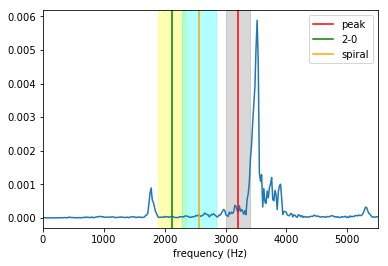

_____________________________________________________
data/BAM:0128.h5


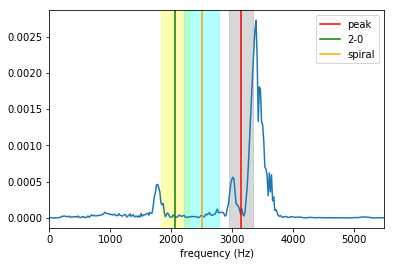

_____________________________________________________


In [22]:

for i in range(len(BAM)):
    name = 'data/BAM:0'+BAM[i]+'.h5' 
    print(name)
    file=h5py.File(name,'r')
    dat = list(file["/rh_22"])
    rh = np.array(file["/rh_22/%s" %dat[-1]])
    freq2,amp2,fig2=analyze(rh,mas2[0])
    ax=plt.subplot()
    ax.axvline(x=(f_p_a[i]*Mc[i])*1000,color='r',label='peak')
    ax.axvspan((f_p_a[i]*Mc[i])*1000-196, (f_p_a[i]*Mc[i])*1000+196, alpha=0.3, color='grey')
    ax.axvline(x=(f_2_a[i]*Mc[i])*1000,color='g',label='2-0')
    ax.axvspan((f_2_a[i]*Mc[i])*1000-229, (f_2_a[i]*Mc[i])*1000+229, alpha=0.3, color='yellow')
    ax.axvline((f_s_a[i]*Mc[i])*1000,color='orange',label='spiral') 
    ax.axvspan((f_s_a[i]*Mc[i])*1000-286, (f_s_a[i]*Mc[i])*1000+286, alpha=0.3, color='cyan')
    plt.xlabel('frequency (Hz)')
    plt.legend()
    plt.show()
    print('_____________________________________________________')
    

data/BAM:0002.h5


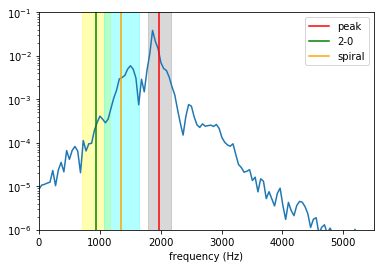

_____________________________________________________
data/BAM:0003.h5


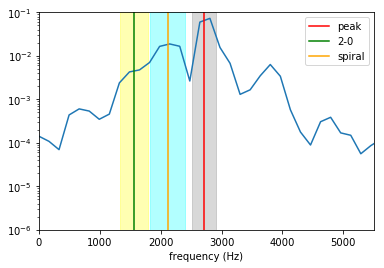

_____________________________________________________
data/BAM:0004.h5


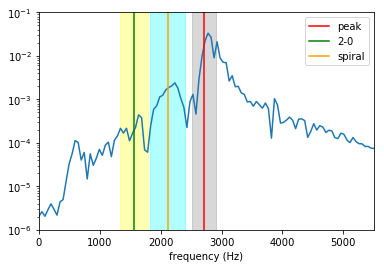

_____________________________________________________
data/BAM:0009.h5


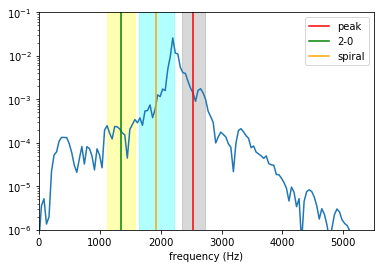

_____________________________________________________
data/BAM:0010.h5


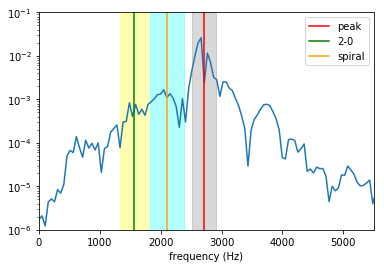

_____________________________________________________
data/BAM:0022.h5


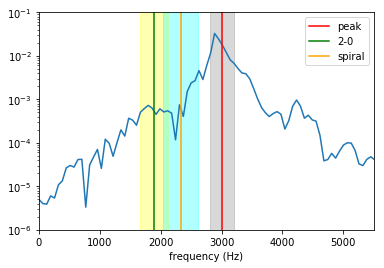

_____________________________________________________
data/BAM:0035.h5


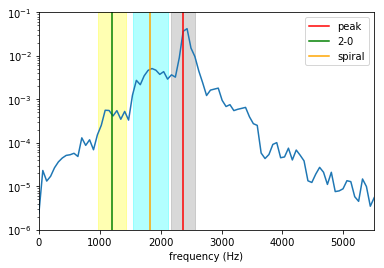

_____________________________________________________
data/BAM:0036.h5


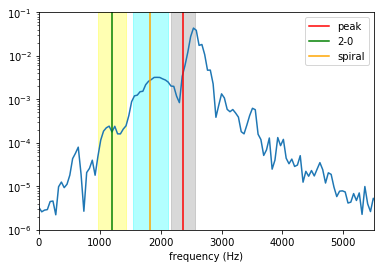

_____________________________________________________
data/BAM:0046.h5


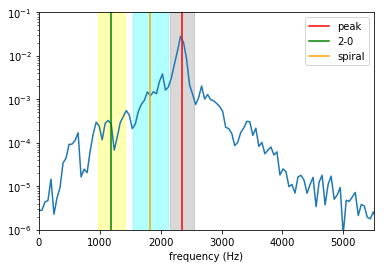

_____________________________________________________
data/BAM:0048.h5


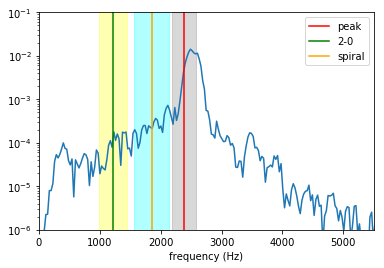

_____________________________________________________
data/BAM:0053.h5


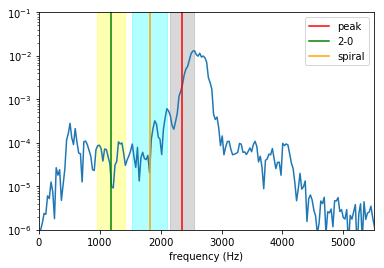

_____________________________________________________
data/BAM:0057.h5


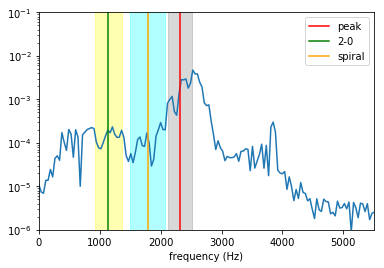

_____________________________________________________
data/BAM:0058.h5


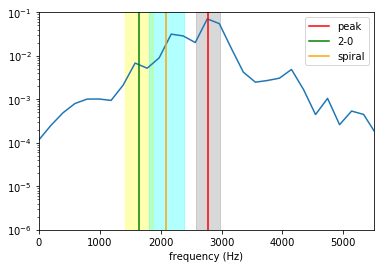

_____________________________________________________
data/BAM:0059.h5


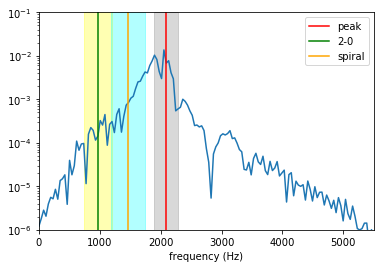

_____________________________________________________
data/BAM:0061.h5


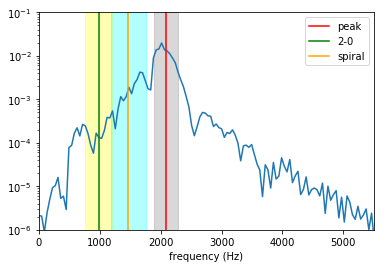

_____________________________________________________
data/BAM:0065.h5


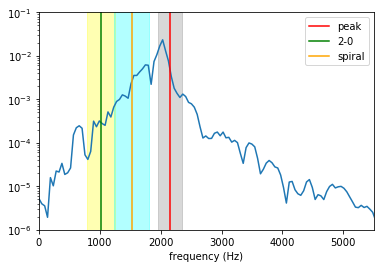

_____________________________________________________
data/BAM:0070.h5


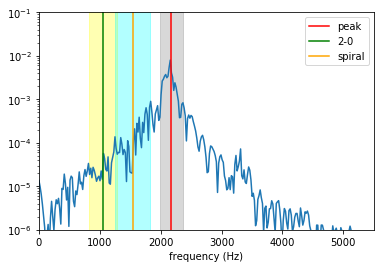

_____________________________________________________
data/BAM:0080.h5


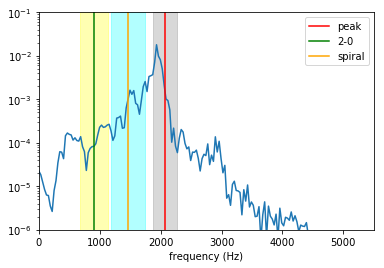

_____________________________________________________
data/BAM:0089.h5


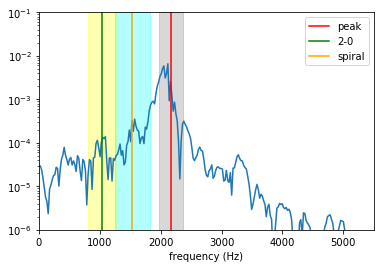

_____________________________________________________
data/BAM:0090.h5


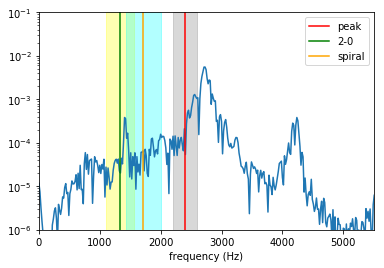

_____________________________________________________
data/BAM:0091.h5


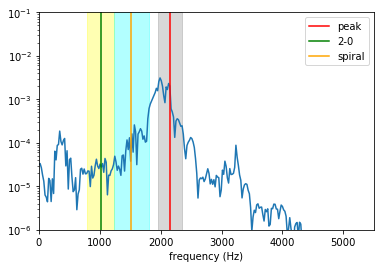

_____________________________________________________
data/BAM:0092.h5


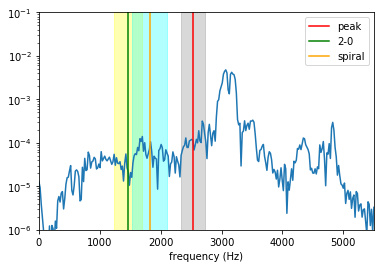

_____________________________________________________
data/BAM:0093.h5


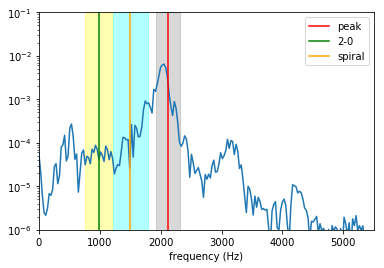

_____________________________________________________
data/BAM:0098.h5


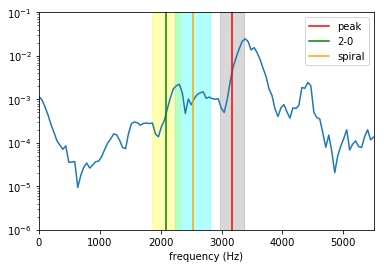

_____________________________________________________
data/BAM:0107.h5


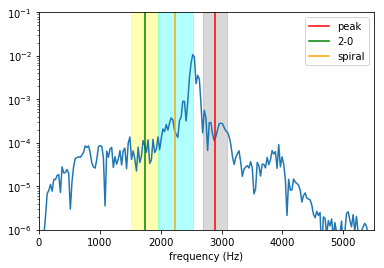

_____________________________________________________
data/BAM:0121.h5


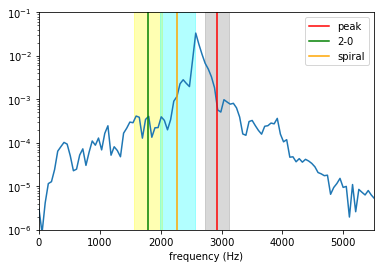

_____________________________________________________
data/BAM:0122.h5


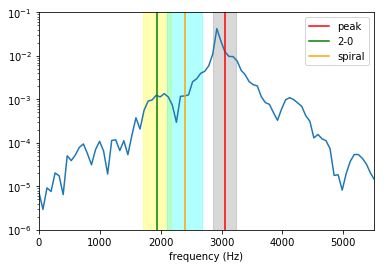

_____________________________________________________
data/BAM:0123.h5


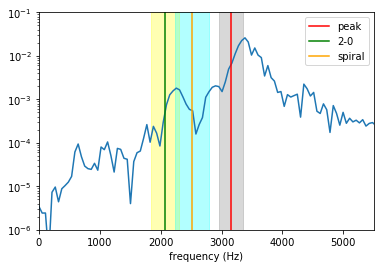

_____________________________________________________
data/BAM:0124.h5


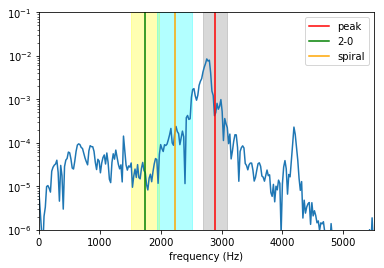

_____________________________________________________
data/BAM:0126.h5


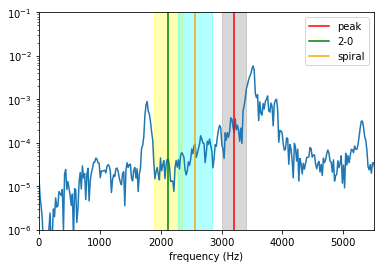

_____________________________________________________
data/BAM:0128.h5


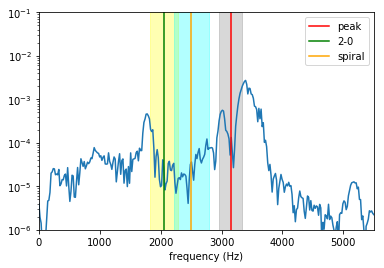

_____________________________________________________


In [23]:

for i in range(len(BAM)):
    name = 'data/BAM:0'+BAM[i]+'.h5' 
    print(name)
    file=h5py.File(name,'r')
    dat = list(file["/rh_22"])
    rh = np.array(file["/rh_22/%s" %dat[-1]])
    freq2,amp2,fig2=analyze(rh,mas2[0])
    ax=plt.subplot()
    ax.axvline(x=(f_p_a[i]*Mc[i])*1000,color='r',label='peak')
    ax.axvspan((f_p_a[i]*Mc[i])*1000-196, (f_p_a[i]*Mc[i])*1000+196, alpha=0.3, color='grey')
    ax.axvline(x=(f_2_a[i]*Mc[i])*1000,color='g',label='2-0')
    ax.axvspan((f_2_a[i]*Mc[i])*1000-229, (f_2_a[i]*Mc[i])*1000+229, alpha=0.3, color='yellow')
    ax.axvline((f_s_a[i]*Mc[i])*1000,color='orange',label='spiral') 
    ax.axvspan((f_s_a[i]*Mc[i])*1000-286, (f_s_a[i]*Mc[i])*1000+286, alpha=0.3, color='cyan')
    plt.xlabel('frequency (Hz)')
    plt.legend()
    plt.yscale('log')
    plt.ylim(10**(-6),10**(-1))
    plt.show()
    print('_____________________________________________________')
    